In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from glob import glob

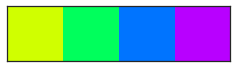

In [83]:
colors = sns.color_palette(palette = 'hsv',n_colors=4, desat = 1)
sns.palplot(colors)

In [84]:
#colors = [colors[2], colors[3], colors[4], colors[-1]]

In [85]:
# colors = [colors[-4], colors[-1], colors[3]]
# sns.palplot(colors)

In [86]:
def get_task(x):
    
    xs = x.split('_')
    t = xs[-2]
    s = xs[-1].replace('.h5', '')
    
    task = "%s %s" % (t, s)
    return task

def sort_data(data, sidx):

    ndata = []
    for model in data.supervised_model.unique():
        d1 = data[data.supervised_model == model].set_index('task').loc[sidx]
        d1 = d1.reset_index()
        ndata.append(d1)
    return pd.concat(ndata)

In [87]:
df = pd.read_csv('../org_results/representation_learning_transcriptomics_results.csv')
df = df[df.normalization == 'z-score']
df = df[df.gene_set == 'O']
df = df[df.score_units == 'AUC']
df1 = df[df.task.apply(lambda x:'stage' in x)]
df2 = df[df.task.apply(lambda x:'grade' in x)]
df = df1.append(df2)

In [88]:
df_stage = pd.read_csv('../01_stage/5FCV_results_stage.csv', index_col = 0)
df_grade = pd.read_csv('../02_grade/5FCV_results_grade.csv', index_col = 0)
df_res = df_stage.append(df_grade)


res = df_res.groupby('task')['score'].mean().to_frame(name = 'score')
res['task'] = res.index.map(lambda x:get_task(x))
res = res.set_index('task')
udf = df[(df.unsupervised_model == 'no embedding') & (df.supervised_model == 'logistic regression')].reset_index(drop=True)
udf['unsupervised_model'] = '2D AggMap'
udf['supervised_model'] = 'AggMapNet'
udf = udf.set_index('task')
udf = udf.drop(columns=['score'])
udf = udf.join(res)
udf = udf.reset_index()

In [89]:
df.append(udf).reset_index(drop=True).to_csv('5FCV_all_results.csv')

/home/sxh/anaconda3/envs/rdkit2020/lib/python3.6/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [90]:
df.supervised_model.unique()

array(['logistic regression', 'random forest', 'k nearest neighbor'],
      dtype=object)

In [91]:
df.unsupervised_model.unique()

array(['no embedding', 'PCA', 'SDAE', 'VAE'], dtype=object)

no embedding {'k nearest neighbor': 0.6098141570789379, 'logistic regression': 0.6860356917788221, 'random forest': 0.6705067864940915}
no embedding {'k nearest neighbor': 0.06983351848659351, 'logistic regression': 0.07755210144818596, 'random forest': 0.07623675892596646}
AggMapNet outperformance no embedding logistic regression on 12 tasks, with 0.667
AggMapNet outperformance no embedding random forest on 16 tasks, with 0.889
AggMapNet outperformance no embedding k nearest neighbor on 18 tasks, with 1.0
PCA {'k nearest neighbor': 0.6065984692950788, 'logistic regression': 0.6622525643490363, 'random forest': 0.6810336642037147}
PCA {'k nearest neighbor': 0.07361607220840848, 'logistic regression': 0.07305843318588615, 'random forest': 0.07608778973634811}
AggMapNet outperformance PCA logistic regression on 16 tasks, with 0.889
AggMapNet outperformance PCA random forest on 15 tasks, with 0.833
AggMapNet outperformance PCA k nearest neighbor on 18 tasks, with 1.0


/home/sxh/anaconda3/envs/rdkit2020/lib/python3.6/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,
/home/sxh/anaconda3/envs/rdkit2020/lib/python3.6/site-packages/ipykernel_launcher.py:61: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
/home/sxh/anaconda3/envs/rdkit2020/lib/python3.6/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,
/home/sxh/anaconda3/envs/rdkit2020/lib/python3.6/site-packages/ipykernel_launcher.py:61: UserW

SDAE {'k nearest neighbor': 0.6240137725145606, 'logistic regression': 0.6536696854837182, 'random forest': 0.6723118498259028}
SDAE {'k nearest neighbor': 0.07643971590645383, 'logistic regression': 0.09410741188341853, 'random forest': 0.07619960340847638}
AggMapNet outperformance SDAE logistic regression on 16 tasks, with 0.889
AggMapNet outperformance SDAE random forest on 15 tasks, with 0.833
AggMapNet outperformance SDAE k nearest neighbor on 18 tasks, with 1.0
VAE {'k nearest neighbor': 0.6321821728828698, 'logistic regression': 0.6684659638288459, 'random forest': 0.672045337244694}
VAE {'k nearest neighbor': 0.0794362486326155, 'logistic regression': 0.08715807316717236, 'random forest': 0.08203248324976471}
AggMapNet outperformance VAE logistic regression on 14 tasks, with 0.778
AggMapNet outperformance VAE random forest on 16 tasks, with 0.889
AggMapNet outperformance VAE k nearest neighbor on 18 tasks, with 1.0


/home/sxh/anaconda3/envs/rdkit2020/lib/python3.6/site-packages/ipykernel_launcher.py:61: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


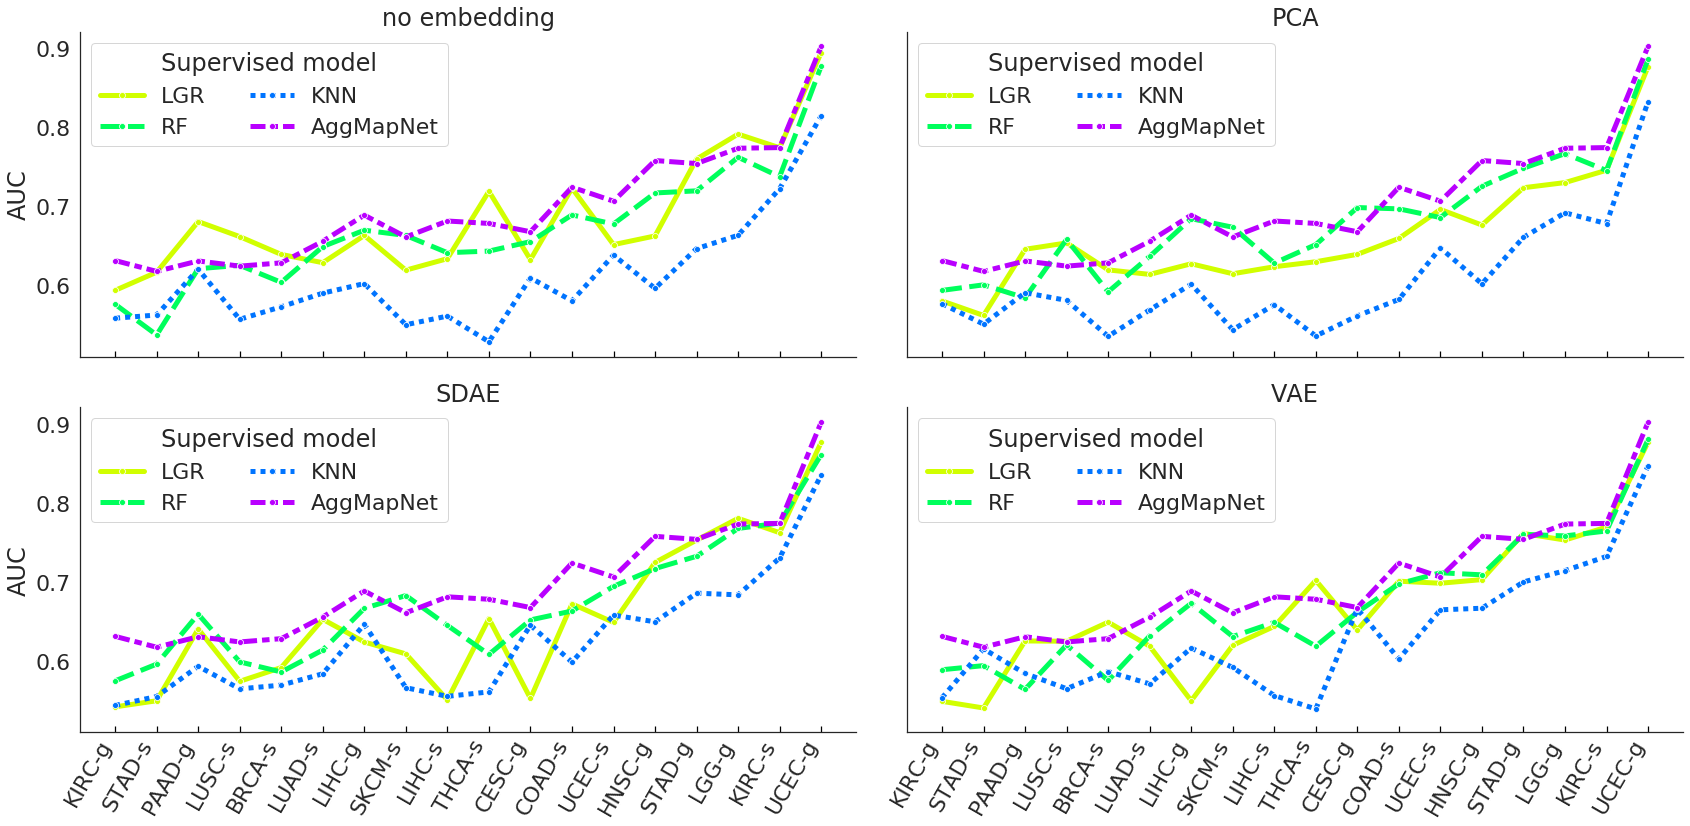

In [93]:
EMBD = ['no embedding', 'PCA', 'SDAE', 'VAE']
sidx = ['KIRC grade', 'STAD stage', 'PAAD grade', 'LUSC stage', 'BRCA stage', 
        'LUAD stage', 'LIHC grade', 'SKCM stage', 'LIHC stage', 'THCA stage', 
        'CESC grade', 'COAD stage', 'UCEC stage', 'HNSC grade', 'STAD grade', 
        'LGG grade', 'KIRC stage', 'UCEC grade']

sns.set(style='white',  font='sans-serif', font_scale=2)
fig, axes  = plt.subplots(2, 2, figsize=(24, 12), sharey=True, sharex=True)

def get_name(x):
    n, c = x.split(' ')
    return n+'-'+c[0]

lss= []
for e, ax in zip(EMBD, axes.ravel()):
    data = df[(df.unsupervised_model == e)]
    
    dt = data.copy()
    print(e, dt.groupby(['supervised_model'])['score'].mean().to_dict())
    print(e, dt.groupby(['supervised_model'])['score'].std().to_dict())
    
    for s in dt.supervised_model.unique():
        a1 = dt[dt.supervised_model == s].set_index('task')['score'].to_frame(name = s)
        b1 = udf.set_index('task')['score'].to_frame(name = 'AggMapNet')
        ab = a1.join(b1)
        n_outperformance = (ab['AggMapNet'] > ab[s]).sum()
        
        print('AggMapNet outperformance %s %s on %s tasks, with %s' % (e, s, n_outperformance, round(n_outperformance/18, 3)))
        
        
    data = data.append(udf)[data.columns]    
    data = sort_data(data, sidx)
    
    #data['task'] = data['task'].apply(get_name)
    
    l = sns.lineplot(x = 'task', y='score', hue = 'supervised_model',style='supervised_model', 
                     palette  = colors, lw = 5, legend = False, #palette = 'hsv', 
                     marker='o',  data = data, sort=False, ax = ax)
    lss.append(l)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    #ax.xticks(rotation=45, ha='right')
    ax.set_ylabel('AUC')
    ax.set_xlabel('')
    ax.set_title(e)

    ax.set_xticklabels([get_name(i) for i in sidx], rotation=60, ha='right') #, ha='left'
    ax.tick_params(axis='x',which='major',direction='in', bottom=True,length=6, color='black')   


    ax.legend(lss,     # The line objects , , 
               labels= ['LGR', 'RF', 'KNN', 'AggMapNet'],   # The labels for each line

               loc='upper left', 
               #bbox_to_anchor=(0, 1.),
               fancybox=True, 
               shadow=False,
               ncol = 2,
               title="Supervised model"  # Title for the legend
               )

    
plt.subplots_adjust(wspace=0.05, hspace=0.1)

fig.tight_layout()

fig.savefig('./performance.pdf', dpi = 400)
fig.savefig('./performance.png', dpi = 400)

In [18]:
seq = ['COAD stage',
'KIRC stage',
'LIHC stage',
'LUAD stage',
'SKCM stage',
'STAD stage',
'THCA stage',
'UCEC stage',
'LUSC stage',
'BRCA stage',
'CESC grade',
'KIRC grade',
'LGG grade',
'LIHC grade',
'PAAD grade',
'STAD grade',
'UCEC grade',
'HNSC grade']


In [21]:
for a, k in enumerate(df.unsupervised_model.unique()):
    odf = df[df.unsupervised_model == k]
    res = []
    for i in odf.supervised_model.unique():
        r = odf[odf.supervised_model == i].set_index('task')['score'].to_frame(name = i)
        res.append(r)

    dfres = pd.concat(res, axis=1).join(udf.set_index('task')['score'].to_frame(name = 'AggMapNet'))
    dfres = dfres.join(udf.set_index('task')['num_samples'])
    dfres = pd.DataFrame(seq).set_index(0).join(dfres)
    dfres.to_csv('5FCV_all_avg_%s_%s.csv' % (a,k))

In [22]:
df.groupby('task')[['score', 'num_samples']].max().sort_values('score',ascending=False)

,score,num_samples
task,,
UCEC grade,0.895007,554
LGG grade,0.791667,532
KIRC stage,0.775042,544
STAD grade,0.761870,416
HNSC grade,0.725638,504
COAD stage,0.723243,505
THCA stage,0.719254,513
UCEC stage,0.712087,554
CESC grade,0.698648,306
